# Proyecto de optimización del Transporte en la logística de reforestación

## Técnicas Matemáticas Utilizadas:
*   Cálculos de volumen: Se utilizaron operaciones de producto y suma para determinar el volumen total requerido por especie y la capacidad necesaria de transporte.
*   Modelado de rutas: Se abordó el problema desde un enfoque de optimización de rutas tipo Problema del Viajante (TSP). Se planteó como objetivo minimizar distancias y tiempos de recorrido entre una bodega y varios puntos (polígonos).
*   Distribución de la demanda: Se establecieron cantidades de demanda por especie y polígono, lo que implicó un manejo de matrices y asignación eficiente de recursos.

## Técnicas Computacionales Utilizadas:
*   Lenguaje Python: Fue el lenguaje base para implementar toda la lógica del proyecto.
*   Librerías empleadas:
numpy: para cálculos matemáticos eficientes.
matplotlib.pyplot y matplotlib.image: para visualización de imágenes y gráficos.
imageio: para manipulación de imágenes.
os, random: para operaciones del sistema y aleatorización.
*   Automatización de rutas y demandas: Uso de ciclos y estructuras de datos para generar rutas diarias por especie y calcular distancias y tiempos acumulados.

## Ventajas Aportadas al Proyecto:
*   Optimización del transporte: al calcular el volumen total de plantas por especie y su equivalencia en vehículos, se logró una mejor planificación logística.
*   Toma de decisiones informada: gracias a los gráficos y cálculos numéricos, se pudieron visualizar rutas y elegir las más eficientes.
*   Reproducibilidad y automatización: al trabajar en Python, todo el proceso es reproducible y escalable para otros conjuntos de datos o escenarios.
*   Reducción de tiempos y costos: al minimizar las distancias recorridas y el número de viajes necesarios.

#Equipo 6

Andrea Renata Garfias Núñez A01369860

Génesis Pereyra Camacho A01734276

Maritza Barrios Macías A00836821

In [ ]:
pip install imageio

#Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import os
import random

#Parámetros

In [ ]:
#Número de plantas por cada hectárea de cada especie
HA = [33, 157, 33, 33, 39, 30, 58, 51, 69, 21]

#Volúmen de cada planta
Volumenes = [502.65, 284.83, 62.83, 122.72, 122.72, 122.72, 122.72, 212.06, 212.06, 122.72]

#Volúmen por cantidad de plantas requeridas por hectárea
Volumenes_por_especie = [x * y for x, y in zip(HA, Volumenes)]

#Volumen total del vehículo
Suma_valumenes_por_planta = sum(Volumenes_por_especie)

#Capacidad del vehículo por especie
Capacidad_vehiculo = [Suma_valumenes_por_planta / x for x in Volumenes]
print(Capacidad_vehiculo)

Poligonos = ['p1', 'p3', 'p4', 'p5', 'p20', 'p23', 'p24', 'p17', 'p16', 'p19', 'p25', 'p26']

Demanda_1_Agave_lechuguilla = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_2_Agave_salmiana = [847.8, 1256, 1256, 1186.92, 216.66, 868.21, 885.48, 959.27, 885.48, 772.44, 792.85, 745.75]
Demanda_3_Agave_scabra = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_4_Agave_striata = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_5_Opuntia_cantabrigiensis = [210.6, 312, 312, 294.84, 53.82, 215.67, 219.96, 238.29, 219.96, 191.88, 196.95, 185.25]
Demanda_6_Opuntia_engelmani = [162, 240, 240, 226.8, 41.4, 165.9, 169.2, 183.3, 169.2, 147.6, 151.5, 142.5]
Demanda_7_Opuntia_robusta = [313.2, 464, 464, 438.48, 80.04, 320.74, 327.12, 354.38, 327.12, 285.36, 292.9, 275.5]
Demanda_8_Opuntia_streptacanta = [275.4, 408, 408, 385.56, 70.38, 282.03, 287.64, 311.61, 287.64, 250.92, 257.55, 242.25]
Demanda_9_Prosopis_laevigata = [372.6, 552, 552, 521.64, 95.22, 381.57, 389.16, 421.59, 389.16, 339.48, 348.45, 327.75]
Demanda_10_Yucca_filifera = [113.4, 168, 168, 158.76, 28.98, 116.13, 118.44, 128.31, 118.44, 103.32, 106.05, 99.75]

#Lista de las demandas por especie
demandas = [Demanda_1_Agave_lechuguilla, Demanda_2_Agave_salmiana, Demanda_3_Agave_scabra, Demanda_4_Agave_striata, Demanda_5_Opuntia_cantabrigiensis,
            Demanda_6_Opuntia_engelmani, Demanda_7_Opuntia_robusta, Demanda_8_Opuntia_streptacanta, Demanda_9_Prosopis_laevigata, Demanda_10_Yucca_filifera]

#Lista de los nombres de cada demanda
nombres_demandas = ["Demanda 1 Agave lechuguilla", "Demanda 2 Agave salmiana", "Demanda 3 Agave scabra", "Demanda 4 Agave striata", "Demanda 5 Opuntia cantabrigiensis",
                    "Demanda 6 Opuntia engelmani", "Demanda 7 Opuntia robusta", "Demanda 8 Opuntia streptacanta", "Demanda 9 Prosopis laevigata", "Demanda 10 Yucca filifera"]

Distancias = [
  [0, 1490, 1260, 1220, 1200, 1000, 440, 220, 240, 500, 660, 900, 1160],
  [1490, 0, 480, 320, 280, 1760, 1600, 1560, 1380, 1340, 1600, 1900, 220],
  [1260, 480, 0, 220, 440, 1340, 1280, 1300, 1260, 1300, 1600, 1900, 1200],
  [1220, 320, 220, 0, 220, 1460, 1300, 1280, 1140, 1160, 1440, 1740, 2060],
  [1200, 280, 440, 220, 0, 1580, 1340, 1300, 110, 1060, 1320, 1640, 1920],
  [1000, 1760, 1340, 1460, 1580, 0, 580, 800, 1220, 1460, 1660, 1900, 2140],
  [440, 1600, 1280, 1300, 1340, 580, 0, 220, 680, 940, 1120, 1320, 1580],
  [220, 1560, 1300, 1280, 1300, 800, 220, 0, 480, 740, 900, 1100, 1360],
  [240, 1380, 1260, 1140, 1100, 1220, 680, 480, 0, 260, 460, 720, 920],
  [500, 1340, 1300, 1160, 1060, 1460, 940, 740, 260, 0, 300, 600, 900],
  [660, 1600, 1600, 1440, 1320, 1660, 1120, 900, 460, 300, 0, 320, 420],
  [900, 1900, 1900, 1300, 1640, 1900, 1320, 1100, 720, 600, 320, 0, 300],
  [1160, 220, 1200, 2060, 1920, 2140, 1580, 1360, 920, 900, 420, 300, 0],
  ]

Tiempos = [
  [0, 0.0745, 0.063, 0.061, 0.06, 0.05, 0.022, 0.011, 0.012, 0.025, 0.033, 0.045, 0.058],
  [0.0745, 0, 0.024, 0.016, 0.014, 0.088, 0.08, 0.078, 0.069, 0.067, 0.08, 0.095, 0.011],
  [0.063, 0.024, 0, 0.011, 0.022, 0.067, 0.064, 0.065, 0.063, 0.065, 0.08, 0.095, 0.06],
  [0.061, 0.016, 0.011, 0, 0.011, 0.073, 0.065, 0.064, 0.057, 0.058, 0.072, 0.087, 0.103],
  [0.06, 0.014, 0.022, 0.011, 0, 0.079, 0.067, 0.065, 0.0055, 0.053, 0.066, 0.082, 0.096],
  [0.05, 0.088, 0.067, 0.0073, 0.079, 0, 0.029, 0.04, 0.061, 0.073, 0.083, 0.095, 0.107],
  [0.022, 0.08, 0.064, 0.065, 0.067, 0.029, 0, 0.011, 0.034, 0.047, 0.056, 0.066, 0.079],
  [0.011, 0.078, 0.065, 0.064, 0.065, 0.04, 0.011, 0, 0.024, 0.037, 0.045, 0.055, 0.068],
  [0.012, 0.069, 0.063, 0.057, 0.055, 0.061, 0.034, 0.024, 0, 0.013, 0.023, 0.036, 0.046],
  [0.025, 0.067, 0.065, 0.058, 0.053, 0.073, 0.047, 0.037, 0.013, 0, 0.015, 0.03, 0.045],
  [0.033, 0.08, 0.08, 0.072, 0.066, 0.083, 0.056, 0.045, 0.023, 0.015, 0, 0.016, 0.021],
  [0.045, 0.095, 0.095, 0.065, 0.082, 0.095, 0.066, 0.055, 0.036, 0.03, 0.016, 0, 0.015],
  [0.058, 0.011, 0.06, 0.0103, 0.096, 0.107, 0.079, 0.068, 0.046, 0.045, 0.021, 0.015, 0],
  ]

Jornada_laboral = 8

Tiempo_carga_descarga = 1

velocidad_kh = 20

[220.90653536257832, 389.8419056981357, 1767.2874423046314, 904.8131518904822, 904.8131518904822, 904.8131518904822, 904.8131518904822, 523.6191172309723, 523.6191172309723, 904.8131518904822]


#Funciones para la optimización

La función `calcular_distancia(ruta)` calcula la distancia total recorrida en una ruta específica. Primero, inicializa la variable `distancia` en cero para acumular la distancia total. Luego, itera sobre cada par de polígonos consecutivos en la `ruta`, añadiendo la distancia entre cada par de polígonos a la variable `distancia` utilizando la matriz de distancias `Distancias`. Finalmente, retorna la distancia total acumulada para la ruta dada.


In [ ]:
def calcular_distancia(ruta):
    distancia = 0
    for i in range(len(ruta) - 1):
        distancia += Distancias[ruta[i]][ruta[i + 1]]
    return distancia

La función `calcular_tiempo(ruta)` calcula el tiempo total empleado en una ruta específica. Comienza inicializando la variable `tiempo` en cero para acumular el tiempo total. Luego, itera sobre cada par de polígonos consecutivos en la `ruta`, añadiendo el tiempo necesario para viajar entre cada par de polígonos a la variable `tiempo` utilizando la matriz de tiempos `Tiempos`. Finalmente, retorna el tiempo total acumulado para la ruta dada.

In [ ]:
def calcular_tiempo(ruta):
    tiempo = 0
    for i in range(len(ruta) - 1):
        tiempo += Tiempos[ruta[i]][ruta[i + 1]]
    return tiempo

Se optimiza las rutas de entrega:

**Inicialización y estructura básica:**
Comienza inicializando variables clave como `rutas`, que almacenará todas las rutas optimizadas, `demanda_pendiente` que es una copia de la demanda inicial para poder ajustarla durante la optimización, `posicion_actual` que indica la posición inicial del vehículo (generalmente en la bodega), `tiempo_acumulado` que lleva la cuenta del tiempo total empleado en cada día de trabajo, y `dias` que es un contador para llevar registro de los días de trabajo.

**Proceso de optimización:**
El algoritmo utiliza dos bucles anidados para construir las rutas de entrega de manera eficiente:

1. **Bucle externo principal (`while sum(demanda_pendiente) > 0`)**:
   - Este bucle se ejecuta hasta que toda la demanda haya sido satisfecha, es decir, hasta que no quede ninguna cantidad pendiente por entregar.

2. **Bucle interno (`while True`)**:
   - Este bucle se encarga de construir una ruta específica para satisfacer la demanda del día.
   - Comienza con la inicialización de una nueva ruta (`ruta = []`) y calcula la capacidad restante del vehículo (`capacidad_restante`).

3. **Selección del polígono más cercano con demanda pendiente**:
   - Utiliza un bucle `for` para iterar sobre todos los polígonos disponibles.
   - Dentro de este bucle, evalúa la distancia desde la `posicion_actual` hasta cada polígono para encontrar el más cercano que aún tenga demanda pendiente.
   - Actualiza la variable `menor_distancia` con la distancia más corta encontrada y guarda el índice del polígono (`poligono_mas_cercano`) que cumple con estas condiciones.

4. **Manejo de la capacidad del vehículo y actualización de la demanda**:
   - Calcula el tiempo necesario para viajar desde la `posicion_actual` hasta el `poligono_mas_cercano` y regresar a la bodega.
   - Verifica si agregar este polígono a la ruta actual no supera la jornada laboral diaria, considerando también el tiempo de carga y descarga.
   - Si se supera este límite, se inicia un nuevo día de trabajo (`dias += 1`) y se reinicia el contador de tiempo acumulado (`tiempo_acumulado = 0`).
   - Añade el polígono más cercano a la ruta actual (`ruta.append(poligono_mas_cercano)`) y ajusta la `capacidad_restante` del vehículo según la demanda del polígono seleccionado.
   - Actualiza la `demanda_pendiente` restando la cantidad satisfecha del polígono más cercano.

5. **Finalización del bucle interno**:
   - El bucle interno termina cuando se llena el vehículo (capacidad restante llega a cero) o cuando se agota el tiempo disponible para ese día.

Este algoritmo asegura que se satisfaga la demanda de manera eficiente, minimizando las distancias recorridas y optimizando el uso del tiempo de trabajo disponible, lo cual es crucial en operaciones logísticas y de distribución.

In [ ]:
def optimizacion(demanda):
    rutas = []
    demanda_pendiente = demanda[:]
    posicion_actual = 0  # Comienza en la bodega
    tiempo_acumulado = 0
    dias = 1

    while sum(demanda_pendiente) > 0:
        ruta = []
        capacidad_restante = Capacidad_vehiculo[posicion_actual]  # Obtener la capacidad del vehículo para el polígono actual
        tiempo_acumulado = 0  # Reiniciar el tiempo acumulado para cada día

        while True:
            menor_distancia = float('inf')
            poligono_mas_cercano = None

            for i in range(1, len(Poligonos) + 1):
                if demanda_pendiente[i - 1] > 0:
                    distancia = Distancias[posicion_actual][i]
                    if distancia < menor_distancia:
                        menor_distancia = distancia
                        poligono_mas_cercano = i

            if poligono_mas_cercano is None:
                break

            tiempo_necesario = Tiempos[posicion_actual][poligono_mas_cercano] + Tiempos[poligono_mas_cercano][0]
            if tiempo_acumulado + tiempo_necesario > Jornada_laboral - Tiempo_carga_descarga:
                dias += 1  # Iniciar un nuevo día
                tiempo_acumulado = 0  # Reiniciar el tiempo acumulado
                continue

            ruta.append(poligono_mas_cercano)
            capacidad_restante -= demanda_pendiente[poligono_mas_cercano - 1]

            if capacidad_restante < 0:
                demanda_pendiente[poligono_mas_cercano - 1] = abs(capacidad_restante)
                capacidad_restante = 0
            else:
                demanda_pendiente[poligono_mas_cercano - 1] = 0

            if capacidad_restante == 0 or tiempo_acumulado >= Jornada_laboral - Tiempo_carga_descarga:
                break

            posicion_actual = poligono_mas_cercano
            tiempo_acumulado += Tiempos[posicion_actual][poligono_mas_cercano] + Tiempos[poligono_mas_cercano][0]

        rutas.append(ruta)
        posicion_actual = 0  # Regresa a la bodega para la siguiente ruta

    return rutas, dias

#Resultados

In [ ]:
# Guardar resultados de rutas y distancias totales
resultados = []
tiempo_total_horas = 0
distancia_total_general = 0
dias_actuales = 1
tiempo_acumulado_dia = 0

for idx, demanda in enumerate(demandas, 1):
    rutas, dias = optimizacion(demanda)
    distancia_total_demanda = sum([calcular_distancia([0] + ruta + [0]) for ruta in rutas])
    tiempo_total_demanda = sum([calcular_tiempo([0] + ruta + [0]) for ruta in rutas])
    resultados.append((idx, rutas, distancia_total_demanda, tiempo_total_demanda, dias))
    tiempo_total_horas += tiempo_total_demanda
    distancia_total_general += distancia_total_demanda

    print(f'{nombres_demandas[idx - 1]}:')
    print(f"Ruta {idx}:")
    for ruta_idx, ruta in enumerate(rutas, 1):
        ruta_poligonos = ['Bodega'] + [Poligonos[i - 1] for i in ruta] + ['Bodega']
        tiempo_ruta = calcular_tiempo([0] + ruta + [0])
        if tiempo_acumulado_dia + tiempo_ruta > Jornada_laboral - Tiempo_carga_descarga:
            dias_actuales += 1
            tiempo_acumulado_dia = tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")
        else:
            tiempo_acumulado_dia += tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")

    print(f"  Distancia total: {distancia_total_demanda:.2f} metros")
    print(f"  Tiempo total: {tiempo_total_demanda:.2f} horas")

# Calcular días totales requeridos
dias_totales = tiempo_total_horas // (Jornada_laboral - Tiempo_carga_descarga) + 1

# Imprimir días totales requeridos para todas las demandas
print("Total de días requeridos para todas las demandas:", dias_totales)

# Imprimir la distancia total general
print(f"Distancia total general: {distancia_total_general:.2f} metros")

# Convertir distancia total general a tiempo en horas
tiempo_total_general_horas = distancia_total_general / 1000 / velocidad_kh

# Imprimir la distancia total general en tiempo
print(f"Tiempo total general: {tiempo_total_general_horas:.2f} horas")

Demanda 1 Agave lechuguilla:
Ruta 1:
  Día 1: Subruta 1: Bodega -> p24 -> p23 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 2: Bodega -> p17 -> p16 -> Bodega - Tiempo: 0.05 horas
  Día 1: Subruta 3: Bodega -> p23 -> p20 -> p3 -> Bodega - Tiempo: 0.18 horas
  Día 1: Subruta 4: Bodega -> p16 -> p19 -> Bodega - Tiempo: 0.07 horas
  Día 1: Subruta 5: Bodega -> p19 -> p25 -> Bodega - Tiempo: 0.09 horas
  Día 1: Subruta 6: Bodega -> p25 -> p26 -> p1 -> Bodega - Tiempo: 0.15 horas
  Día 1: Subruta 7: Bodega -> p5 -> Bodega - Tiempo: 0.12 horas
  Día 1: Subruta 8: Bodega -> p5 -> p4 -> Bodega - Tiempo: 0.13 horas
  Día 1: Subruta 9: Bodega -> p4 -> p3 -> Bodega - Tiempo: 0.14 horas
  Día 1: Subruta 10: Bodega -> p3 -> p1 -> Bodega - Tiempo: 0.16 horas
  Día 1: Subruta 11: Bodega -> p1 -> Bodega - Tiempo: 0.15 horas
  Distancia total: 25700.00 metros
  Tiempo total: 1.29 horas
Demanda 2 Agave salmiana:
Ruta 2:
  Día 1: Subruta 1: Bodega -> p24 -> Bodega - Tiempo: 0.02 horas
  Día 1: Subruta 2

In [ ]:
# Seleccionar las demandas de interés (Agave scabra y Agave striata)
demanda_3 = demandas[2]  # Agave scabra
demanda_4 = demandas[3]  # Agave striata

# Preparar los nombres de las demandas de interés
nombres_demandas_interes = [nombres_demandas[2], nombres_demandas[3]]

for idx, demanda in enumerate([demanda_3, demanda_4], start=3):
    rutas, dias = optimizacion(demanda)
    distancia_total_demanda = sum([Distancias[0][ruta[0]] + sum([Distancias[ruta[i]][ruta[i + 1]] for i in range(len(ruta) - 1)]) for ruta in rutas])
    tiempo_total_demanda = sum([Tiempos[0][ruta[0]] + sum([Tiempos[ruta[i]][ruta[i + 1]] for i in range(len(ruta) - 1)]) for ruta in rutas])

    print(f'{nombres_demandas_interes[idx - 3]}:')
    print(f"Ruta {idx - 2}:")
    for ruta_idx, ruta in enumerate(rutas, 1):
        ruta_poligonos = ['Bodega'] + [Poligonos[i - 1] for i in ruta] + ['Bodega']
        tiempo_ruta = Tiempos[0][ruta[0]] + sum([Tiempos[ruta[i]][ruta[i + 1]] for i in range(len(ruta) - 1)]) + Tiempos[ruta[-1]][0]
        print(f"  Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")

    print(f"  Distancia total: {distancia_total_demanda:.2f} metros")
    print(f"  Tiempo total: {tiempo_total_demanda:.2f} horas")
    print()

Demanda 3 Agave scabra:
Ruta 1:
  Subruta 1: Bodega -> p24 -> p23 -> Bodega - Tiempo: 0.04 horas
  Subruta 2: Bodega -> p17 -> p16 -> Bodega - Tiempo: 0.05 horas
  Subruta 3: Bodega -> p23 -> p20 -> p3 -> Bodega - Tiempo: 0.18 horas
  Subruta 4: Bodega -> p16 -> p19 -> Bodega - Tiempo: 0.07 horas
  Subruta 5: Bodega -> p19 -> p25 -> Bodega - Tiempo: 0.09 horas
  Subruta 6: Bodega -> p25 -> p26 -> p1 -> Bodega - Tiempo: 0.15 horas
  Subruta 7: Bodega -> p5 -> Bodega - Tiempo: 0.12 horas
  Subruta 8: Bodega -> p5 -> p4 -> Bodega - Tiempo: 0.13 horas
  Subruta 9: Bodega -> p4 -> p3 -> Bodega - Tiempo: 0.14 horas
  Subruta 10: Bodega -> p3 -> p1 -> Bodega - Tiempo: 0.16 horas
  Subruta 11: Bodega -> p1 -> Bodega - Tiempo: 0.15 horas
  Distancia total: 13790.00 metros
  Tiempo total: 0.69 horas

Demanda 4 Agave striata:
Ruta 2:
  Subruta 1: Bodega -> p24 -> p23 -> Bodega - Tiempo: 0.04 horas
  Subruta 2: Bodega -> p17 -> p16 -> Bodega - Tiempo: 0.05 horas
  Subruta 3: Bodega -> p23 -> p20 -

#Mapa de ruteo

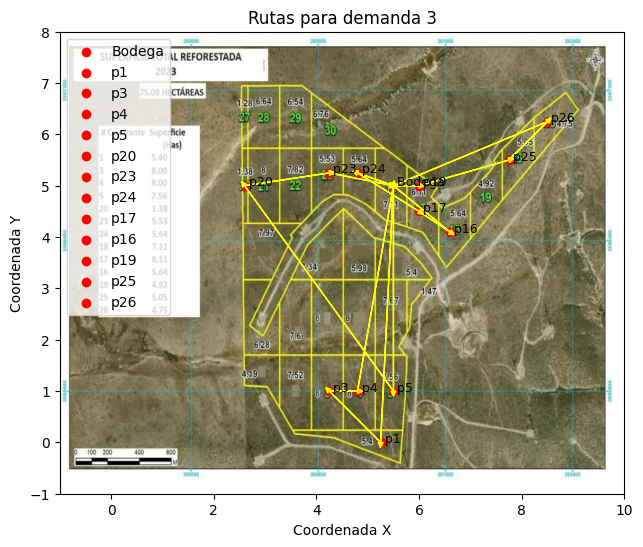

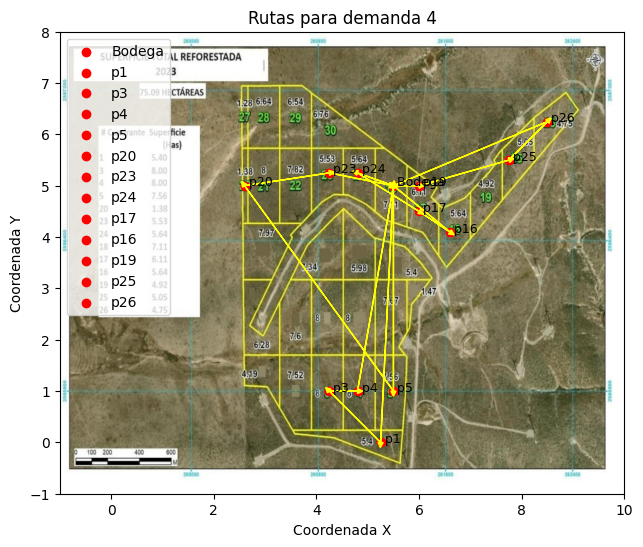

In [ ]:
coordenadas_poligonos = {
    'Bodega': (5.5, 5),
    'p1': (5.25, 0), 'p3': (4.25, 1), 'p4': (4.8, 1), 'p5': (5.5, 1), 'p20': (2.6, 5), 'p23': (4.25, 5.25),
    'p24': (4.8, 5.25), 'p17': (6, 4.5), 'p16': (6.6, 4.1), 'p19': (6, 5), 'p25': (7.75, 5.5), 'p26': (8.5, 6.25)
}

# Función para trazar las rutas sobre la imagen de fondo
def trazar_rutas_sobre_imagen(imagen_path, rutas, titulo):
    img = mpimg.imread(imagen_path)

    plt.figure(figsize=(10, 6))
    plt.imshow(img, extent=[-1, 10, -1, 8])  # Ajustar 'extent' según el tamaño y las coordenadas de tu imagen

    # Trazar puntos de los polígonos
    for poligono, (x, y) in coordenadas_poligonos.items():
        plt.scatter(x, y, label=poligono, color='red')
        plt.text(x, y, f' {poligono}', fontsize=9, color='black')

    # Trazar rutas con flechas
    for ruta in rutas:
        ruta_completa = ['Bodega'] + [f'p{i}' for i in ruta] + ['Bodega']
        for i in range(len(ruta_completa) - 1):
            x1, y1 = coordenadas_poligonos[ruta_completa[i]]
            x2, y2 = coordenadas_poligonos[ruta_completa[i + 1]]
            dx, dy = x2 - x1, y2 - y1
            plt.arrow(x1, y1, dx, dy, head_width=0.1, head_length=0.1, fc='yellow', ec='yellow')

    plt.title(titulo)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.legend()
    plt.grid(False)
    plt.show()

# Función ficticia de optimización (para fines de demostración)
def optimizacion(demanda):
    # Aquí pondrías tu lógica de optimización. Esta es una implementación ficticia:
    rutas = [[1, 3, 4], [5, 20, 23], [24, 17, 16], [19, 25, 26]]
    return rutas

# Ruta de la imagen de fondo
imagen_path = 'Mapa_Poligonos.jpeg'

# Trazar las rutas de la demanda 3 (Agave scabra) y la demanda 4 (Agave striata) sobre la imagen
for idx, demanda in enumerate([demanda_3, demanda_4], start=3):
    rutas = optimizacion(demanda)
    trazar_rutas_sobre_imagen(imagen_path, rutas, f'Rutas para demanda {idx}')

#Video de las rutas

In [ ]:
coordenadas_poligonos = {
    'Bodega': (5.5, 5),
    'p1': (5.25, 0), 'p3': (4.25, 1), 'p4': (4.8, 1), 'p5': (5.5, 1), 'p20': (2.6, 5), 'p23': (4.25, 5.25),
    'p24': (4.8, 5.25), 'p17': (6, 4.5), 'p16': (6.6, 4.1), 'p19': (6, 5), 'p25': (7.75, 5.5), 'p26': (8.5, 6.25)
}

# Función para trazar rutas sobre la imagen y guardar cada paso como archivo PNG
def trazar_rutas_sobre_imagen(imagen_path, rutas, nombre_demanda, indice_demanda):
    img = mpimg.imread(imagen_path)
    pasos = []

    for ruta_idx, ruta in enumerate(rutas, 1):
        ruta_completa = ['Bodega'] + [f'p{i}' for i in ruta] + ['Bodega']

        for paso in range(1, len(ruta_completa)):
            plt.figure(figsize=(10, 6))
            plt.imshow(img, extent=[-1, 10, -1, 8])

            # Trazar puntos de los polígonos
            for poligono, (x, y) in coordenadas_poligonos.items():
                plt.scatter(x, y, label=poligono, color='red')
                plt.text(x, y, f' {poligono}', fontsize=9, color='black')

            # Trazar ruta parcial con flechas
            for i in range(paso):
                x1, y1 = coordenadas_poligonos[ruta_completa[i]]
                x2, y2 = coordenadas_poligonos[ruta_completa[i + 1]]
                dx, dy = x2 - x1, y2 - y1
                plt.arrow(x1, y1, dx, dy, head_width=0.1, head_length=0.1, fc='yellow', ec='yellow')

            plt.title(f'Rutas para {nombre_demanda} - Paso {ruta_idx}.{paso}')
            plt.xlabel('Coordenada X')
            plt.ylabel('Coordenada Y')
            plt.legend()
            plt.grid(False)

            # Guardar cada paso como imagen
            filename = f"ruta_{indice_demanda}_paso_{ruta_idx}_{paso}.png"
            pasos.append(filename)
            plt.savefig(filename)
            plt.close()

    return pasos

# Datos ficticios de optimización (puedes usar tu propia lógica de optimización aquí)
def optimizacion(demanda):
    rutas = [[1, 3, 4], [5, 20, 23], [24, 17, 16], [19, 25, 26]]
    return rutas

# Ruta de la imagen de fondo
imagen_path = 'Mapa_Poligonos.jpeg'

# Seleccionar las demandas de interés (Agave scabra y Agave striata)
demanda_3 = demandas[2]  # Agave scabra
demanda_4 = demandas[3]  # Agave striata

# Generar y guardar imágenes de las rutas paso a paso
imagenes_rutas = []

for idx, (demanda, nombre_demanda) in enumerate(zip([demanda_3, demanda_4], ['Agave scabra', 'Agave striata']), start=3):
    rutas = optimizacion(demanda)
    imagenes_rutas.extend(trazar_rutas_sobre_imagen(imagen_path, rutas, nombre_demanda, idx))

# Verifica que las imágenes se hayan generado correctamente
print(imagenes_rutas)

# Crear un video a partir de las imágenes generadas
import imageio

# Ruta para guardar el video
video_path = 'rutas_video.mp4'

# Leer las imágenes y escribirlas en un video
with imageio.get_writer(video_path, fps=2) as writer:
    for filename in imagenes_rutas:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f"Video guardado en: {video_path}")

# Limpiar archivos de imagenes
for filename in imagenes_rutas:
    os.remove(filename)

['ruta_3_paso_1_1.png', 'ruta_3_paso_1_2.png', 'ruta_3_paso_1_3.png', 'ruta_3_paso_1_4.png', 'ruta_3_paso_2_1.png', 'ruta_3_paso_2_2.png', 'ruta_3_paso_2_3.png', 'ruta_3_paso_2_4.png', 'ruta_3_paso_3_1.png', 'ruta_3_paso_3_2.png', 'ruta_3_paso_3_3.png', 'ruta_3_paso_3_4.png', 'ruta_3_paso_4_1.png', 'ruta_3_paso_4_2.png', 'ruta_3_paso_4_3.png', 'ruta_3_paso_4_4.png', 'ruta_4_paso_1_1.png', 'ruta_4_paso_1_2.png', 'ruta_4_paso_1_3.png', 'ruta_4_paso_1_4.png', 'ruta_4_paso_2_1.png', 'ruta_4_paso_2_2.png', 'ruta_4_paso_2_3.png', 'ruta_4_paso_2_4.png', 'ruta_4_paso_3_1.png', 'ruta_4_paso_3_2.png', 'ruta_4_paso_3_3.png', 'ruta_4_paso_3_4.png', 'ruta_4_paso_4_1.png', 'ruta_4_paso_4_2.png', 'ruta_4_paso_4_3.png', 'ruta_4_paso_4_4.png']


<ipython-input-66-e8ed0e3c5247>:76: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Video guardado en: rutas_video.mp4


#Generación de rutas con 5 polígonos (escogiéndolos aleatoriamente)

In [ ]:
#Número de plantas por cada hectárea de cada especie
HA = [33, 157, 33, 33, 39, 30, 58, 51, 69, 21]

#Volúmen de cada planta
Volumenes = [502.65, 284.83, 62.83, 122.72, 122.72, 122.72, 122.72, 212.06, 212.06, 122.72]

#Volúmen por cantidad de plantas requeridas por hectárea
Volumenes_por_especie = [x * y for x, y in zip(HA, Volumenes)]

#Volumen total del vehículo
Suma_valumenes_por_planta = sum(Volumenes_por_especie)

#Capacidad del vehículo por especie
Capacidad_vehiculo = [Suma_valumenes_por_planta / x for x in Volumenes]
print(Capacidad_vehiculo)

Poligonos = ['p1', 'p3', 'p4', 'p5', 'p20', 'p23', 'p24', 'p17', 'p16', 'p19', 'p25', 'p26']

Demanda_1_Agave_lechuguilla = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_2_Agave_salmiana = [847.8, 1256, 1256, 1186.92, 216.66, 868.21, 885.48, 959.27, 885.48, 772.44, 792.85, 745.75]
Demanda_3_Agave_scabra = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_4_Agave_striata = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_5_Opuntia_cantabrigiensis = [210.6, 312, 312, 294.84, 53.82, 215.67, 219.96, 238.29, 219.96, 191.88, 196.95, 185.25]
Demanda_6_Opuntia_engelmani = [162, 240, 240, 226.8, 41.4, 165.9, 169.2, 183.3, 169.2, 147.6, 151.5, 142.5]
Demanda_7_Opuntia_robusta = [313.2, 464, 464, 438.48, 80.04, 320.74, 327.12, 354.38, 327.12, 285.36, 292.9, 275.5]
Demanda_8_Opuntia_streptacanta = [275.4, 408, 408, 385.56, 70.38, 282.03, 287.64, 311.61, 287.64, 250.92, 257.55, 242.25]
Demanda_9_Prosopis_laevigata = [372.6, 552, 552, 521.64, 95.22, 381.57, 389.16, 421.59, 389.16, 339.48, 348.45, 327.75]
Demanda_10_Yucca_filifera = [113.4, 168, 168, 158.76, 28.98, 116.13, 118.44, 128.31, 118.44, 103.32, 106.05, 99.75]

#Lista de las demandas por especie
demandas = [Demanda_1_Agave_lechuguilla, Demanda_2_Agave_salmiana, Demanda_3_Agave_scabra, Demanda_4_Agave_striata, Demanda_5_Opuntia_cantabrigiensis,
            Demanda_6_Opuntia_engelmani, Demanda_7_Opuntia_robusta, Demanda_8_Opuntia_streptacanta, Demanda_9_Prosopis_laevigata, Demanda_10_Yucca_filifera]

#Lista de los nombres de cada demanda
nombres_demandas = ["Demanda 1 Agave lechuguilla", "Demanda 2 Agave salmiana", "Demanda 3 Agave scabra", "Demanda 4 Agave striata", "Demanda 5 Opuntia cantabrigiensis",
                    "Demanda 6 Opuntia engelmani", "Demanda 7 Opuntia robusta", "Demanda 8 Opuntia streptacanta", "Demanda 9 Prosopis laevigata", "Demanda 10 Yucca filifera"]

Distancias = [
  [0, 1490, 1260, 1220, 1200, 1000, 440, 220, 240, 500, 660, 900, 1160],
  [1490, 0, 480, 320, 280, 1760, 1600, 1560, 1380, 1340, 1600, 1900, 220],
  [1260, 480, 0, 220, 440, 1340, 1280, 1300, 1260, 1300, 1600, 1900, 1200],
  [1220, 320, 220, 0, 220, 1460, 1300, 1280, 1140, 1160, 1440, 1740, 2060],
  [1200, 280, 440, 220, 0, 1580, 1340, 1300, 110, 1060, 1320, 1640, 1920],
  [1000, 1760, 1340, 1460, 1580, 0, 580, 800, 1220, 1460, 1660, 1900, 2140],
  [440, 1600, 1280, 1300, 1340, 580, 0, 220, 680, 940, 1120, 1320, 1580],
  [220, 1560, 1300, 1280, 1300, 800, 220, 0, 480, 740, 900, 1100, 1360],
  [240, 1380, 1260, 1140, 1100, 1220, 680, 480, 0, 260, 460, 720, 920],
  [500, 1340, 1300, 1160, 1060, 1460, 940, 740, 260, 0, 300, 600, 900],
  [660, 1600, 1600, 1440, 1320, 1660, 1120, 900, 460, 300, 0, 320, 420],
  [900, 1900, 1900, 1300, 1640, 1900, 1320, 1100, 720, 600, 320, 0, 300],
  [1160, 220, 1200, 2060, 1920, 2140, 1580, 1360, 920, 900, 420, 300, 0],
  ]

Tiempos = [
  [0, 0.0745, 0.063, 0.061, 0.06, 0.05, 0.022, 0.011, 0.012, 0.025, 0.033, 0.045, 0.058],
  [0.0745, 0, 0.024, 0.016, 0.014, 0.088, 0.08, 0.078, 0.069, 0.067, 0.08, 0.095, 0.011],
  [0.063, 0.024, 0, 0.011, 0.022, 0.067, 0.064, 0.065, 0.063, 0.065, 0.08, 0.095, 0.06],
  [0.061, 0.016, 0.011, 0, 0.011, 0.073, 0.065, 0.064, 0.057, 0.058, 0.072, 0.087, 0.103],
  [0.06, 0.014, 0.022, 0.011, 0, 0.079, 0.067, 0.065, 0.0055, 0.053, 0.066, 0.082, 0.096],
  [0.05, 0.088, 0.067, 0.0073, 0.079, 0, 0.029, 0.04, 0.061, 0.073, 0.083, 0.095, 0.107],
  [0.022, 0.08, 0.064, 0.065, 0.067, 0.029, 0, 0.011, 0.034, 0.047, 0.056, 0.066, 0.079],
  [0.011, 0.078, 0.065, 0.064, 0.065, 0.04, 0.011, 0, 0.024, 0.037, 0.045, 0.055, 0.068],
  [0.012, 0.069, 0.063, 0.057, 0.055, 0.061, 0.034, 0.024, 0, 0.013, 0.023, 0.036, 0.046],
  [0.025, 0.067, 0.065, 0.058, 0.053, 0.073, 0.047, 0.037, 0.013, 0, 0.015, 0.03, 0.045],
  [0.033, 0.08, 0.08, 0.072, 0.066, 0.083, 0.056, 0.045, 0.023, 0.015, 0, 0.016, 0.021],
  [0.045, 0.095, 0.095, 0.065, 0.082, 0.095, 0.066, 0.055, 0.036, 0.03, 0.016, 0, 0.015],
  [0.058, 0.011, 0.06, 0.0103, 0.096, 0.107, 0.079, 0.068, 0.046, 0.045, 0.021, 0.015, 0],
  ]

Jornada_laboral = 8

Tiempo_carga_descarga = 1

velocidad_kh = 20

[220.90653536257832, 389.8419056981357, 1767.2874423046314, 904.8131518904822, 904.8131518904822, 904.8131518904822, 904.8131518904822, 523.6191172309723, 523.6191172309723, 904.8131518904822]


In [ ]:
import random

# Seleccionar aleatoriamente 5 polígonos
poligonos_seleccionados = random.sample(range(len(Poligonos)), 5)

# Verificar y ajustar poligonos_seleccionados si es necesario
poligonos_seleccionados = [p for p in poligonos_seleccionados if p < len(Capacidad_vehiculo)]

# Filtrar las demandas, distancias y tiempos según los polígonos seleccionados
demandas_filtradas = [[demanda[i] for i in poligonos_seleccionados] for demanda in demandas]
Distancias_filtradas = [[Distancias[i][j] for j in [0] + poligonos_seleccionados] for i in [0] + poligonos_seleccionados]
Tiempos_filtrados = [[Tiempos[i][j] for j in [0] + poligonos_seleccionados] for i in [0] + poligonos_seleccionados]

# Capacidad del vehículo filtrada
Capacidad_vehiculo_filtrada = [Capacidad_vehiculo[p] for p in poligonos_seleccionados]

In [ ]:
def calcular_distancia(ruta):
    distancia = 0
    for i in range(len(ruta) - 1):
        distancia += Distancias_filtradas[ruta[i]][ruta[i + 1]]
    return distancia

def calcular_tiempo(ruta):
    tiempo = 0
    for i in range(len(ruta) - 1):
        tiempo += Tiempos_filtrados[ruta[i]][ruta[i + 1]]
    return tiempo

In [ ]:
def optimizacion(demanda):
    rutas = []
    demanda_pendiente = demanda[:]
    posicion_actual = 0  # Comienza en la bodega
    tiempo_acumulado = 0
    dias = 1

    while sum(demanda_pendiente) > 0:
        ruta = []
        capacidad_restante = Capacidad_vehiculo[posicion_actual]  # Obtener la capacidad del vehículo para el polígono actual
        tiempo_acumulado = 0  # Reiniciar el tiempo acumulado para cada día

        while True:
            menor_distancia = float('inf')
            poligono_mas_cercano = None

            for i in range(len(demanda_pendiente)):
              if demanda_pendiente[i] > 0:
                distancia = Distancias_filtradas[posicion_actual][i + 1]  # i+1 porque i inicia en 0
                if distancia < menor_distancia:
                  menor_distancia = distancia
                  poligono_mas_cercano = i + 1

            if poligono_mas_cercano is None:
                break

            tiempo_necesario = Tiempos_filtrados[posicion_actual][poligono_mas_cercano] + Tiempos_filtrados[poligono_mas_cercano][0]
            if tiempo_acumulado + tiempo_necesario > Jornada_laboral - Tiempo_carga_descarga:
                dias += 1  # Iniciar un nuevo día
                tiempo_acumulado = 0  # Reiniciar el tiempo acumulado
                continue

            ruta.append(poligono_mas_cercano)
            capacidad_restante -= demanda_pendiente[poligono_mas_cercano - 1]

            if capacidad_restante < 0:
                demanda_pendiente[poligono_mas_cercano - 1] = abs(capacidad_restante)
                capacidad_restante = 0
            else:
                demanda_pendiente[poligono_mas_cercano - 1] = 0

            if capacidad_restante == 0 or tiempo_acumulado >= Jornada_laboral - Tiempo_carga_descarga:
                break

            posicion_actual = poligono_mas_cercano
            tiempo_acumulado += Tiempos_filtrados[posicion_actual][poligono_mas_cercano] + Tiempos_filtrados[poligono_mas_cercano][0]

        rutas.append(ruta)
        posicion_actual = 0  # Regresa a la bodega para la siguiente ruta

    return rutas, dias

In [ ]:
# Guardar resultados de rutas y distancias totales
resultados = []
tiempo_total_horas = 0
distancia_total_general = 0
dias_actuales = 1
tiempo_acumulado_dia = 0

for idx, demanda in enumerate(demandas_filtradas, 1):
    rutas, dias = optimizacion(demanda)
    distancia_total_demanda = sum([calcular_distancia([0] + ruta + [0]) for ruta in rutas])
    tiempo_total_demanda = sum([calcular_tiempo([0] + ruta + [0]) for ruta in rutas])
    resultados.append((idx, rutas, distancia_total_demanda, tiempo_total_demanda, dias))
    tiempo_total_horas += tiempo_total_demanda
    distancia_total_general += distancia_total_demanda

    print(f'{nombres_demandas[idx - 1]}:')
    print(f"Ruta {idx}:")
    for ruta_idx, ruta in enumerate(rutas, 1):
        ruta_poligonos = ['Bodega'] + [Poligonos[i - 1] for i in ruta] + ['Bodega']
        tiempo_ruta = calcular_tiempo([0] + ruta + [0])
        if tiempo_acumulado_dia + tiempo_ruta > Jornada_laboral - Tiempo_carga_descarga:
            dias_actuales += 1
            tiempo_acumulado_dia = tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")
        else:
            tiempo_acumulado_dia += tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")

    print(f"  Distancia total: {distancia_total_demanda:.2f} metros")
    print(f"  Tiempo total: {tiempo_total_demanda:.2f} horas")

# Calcular días totales requeridos
dias_totales = tiempo_total_horas // (Jornada_laboral - Tiempo_carga_descarga) + 1

# Imprimir días totales requeridos para todas las demandas
print("Total de días requeridos para todas las demandas:", dias_totales)

# Imprimir la distancia total general
print(f"Distancia total general: {distancia_total_general:.2f} metros")

# Convertir distancia total general a tiempo en horas
tiempo_total_general_horas = distancia_total_general / 1000 / velocidad_kh

# Imprimir la distancia total general en tiempo
print(f"Tiempo total general: {tiempo_total_general_horas:.2f} horas")

Demanda 1 Agave lechuguilla:
Ruta 1:
  Día 1: Subruta 1: Bodega -> p4 -> p1 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 2: Bodega -> p1 -> p20 -> Bodega - Tiempo: 0.09 horas
  Día 1: Subruta 3: Bodega -> p20 -> p3 -> p5 -> Bodega - Tiempo: 0.17 horas
  Día 1: Subruta 4: Bodega -> p5 -> Bodega - Tiempo: 0.15 horas
  Distancia total: 9070.00 metros
  Tiempo total: 0.45 horas
Demanda 2 Agave salmiana:
Ruta 2:
  Día 1: Subruta 1: Bodega -> p4 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 2: Bodega -> p4 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 3: Bodega -> p4 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 4: Bodega -> p4 -> p1 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 5: Bodega -> p1 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 6: Bodega -> p1 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 7: Bodega -> p1 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 8: Bodega -> p1 -> p20 -> Bodega - Tiempo: 0.09 horas
  Día 1: Subruta 9: Bodega -> p20 -> Bodega - Tiempo: 0.05 ho

#Generación de rutas con 10 polígonos (escogiéndolos aleatoriamente)

In [ ]:
#Número de plantas por cada hectárea de cada especie
HA = [33, 157, 33, 33, 39, 30, 58, 51, 69, 21]

#Volúmen de cada planta
Volumenes = [502.65, 284.83, 62.83, 122.72, 122.72, 122.72, 122.72, 212.06, 212.06, 122.72]

#Volúmen por cantidad de plantas requeridas por hectárea
Volumenes_por_especie = [x * y for x, y in zip(HA, Volumenes)]

#Volumen total del vehículo
Suma_valumenes_por_planta = sum(Volumenes_por_especie)

#Capacidad del vehículo por especie
Capacidad_vehiculo = [Suma_valumenes_por_planta / x for x in Volumenes]
print(Capacidad_vehiculo)

Poligonos = ['p1', 'p3', 'p4', 'p5', 'p20', 'p23', 'p24', 'p17', 'p16', 'p19', 'p25', 'p26']

Demanda_1_Agave_lechuguilla = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_2_Agave_salmiana = [847.8, 1256, 1256, 1186.92, 216.66, 868.21, 885.48, 959.27, 885.48, 772.44, 792.85, 745.75]
Demanda_3_Agave_scabra = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_4_Agave_striata = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_5_Opuntia_cantabrigiensis = [210.6, 312, 312, 294.84, 53.82, 215.67, 219.96, 238.29, 219.96, 191.88, 196.95, 185.25]
Demanda_6_Opuntia_engelmani = [162, 240, 240, 226.8, 41.4, 165.9, 169.2, 183.3, 169.2, 147.6, 151.5, 142.5]
Demanda_7_Opuntia_robusta = [313.2, 464, 464, 438.48, 80.04, 320.74, 327.12, 354.38, 327.12, 285.36, 292.9, 275.5]
Demanda_8_Opuntia_streptacanta = [275.4, 408, 408, 385.56, 70.38, 282.03, 287.64, 311.61, 287.64, 250.92, 257.55, 242.25]
Demanda_9_Prosopis_laevigata = [372.6, 552, 552, 521.64, 95.22, 381.57, 389.16, 421.59, 389.16, 339.48, 348.45, 327.75]
Demanda_10_Yucca_filifera = [113.4, 168, 168, 158.76, 28.98, 116.13, 118.44, 128.31, 118.44, 103.32, 106.05, 99.75]

#Lista de las demandas por especie
demandas = [Demanda_1_Agave_lechuguilla, Demanda_2_Agave_salmiana, Demanda_3_Agave_scabra, Demanda_4_Agave_striata, Demanda_5_Opuntia_cantabrigiensis,
            Demanda_6_Opuntia_engelmani, Demanda_7_Opuntia_robusta, Demanda_8_Opuntia_streptacanta, Demanda_9_Prosopis_laevigata, Demanda_10_Yucca_filifera]

#Lista de los nombres de cada demanda
nombres_demandas = ["Demanda 1 Agave lechuguilla", "Demanda 2 Agave salmiana", "Demanda 3 Agave scabra", "Demanda 4 Agave striata", "Demanda 5 Opuntia cantabrigiensis",
                    "Demanda 6 Opuntia engelmani", "Demanda 7 Opuntia robusta", "Demanda 8 Opuntia streptacanta", "Demanda 9 Prosopis laevigata", "Demanda 10 Yucca filifera"]

Distancias = [
  [0, 1490, 1260, 1220, 1200, 1000, 440, 220, 240, 500, 660, 900, 1160],
  [1490, 0, 480, 320, 280, 1760, 1600, 1560, 1380, 1340, 1600, 1900, 220],
  [1260, 480, 0, 220, 440, 1340, 1280, 1300, 1260, 1300, 1600, 1900, 1200],
  [1220, 320, 220, 0, 220, 1460, 1300, 1280, 1140, 1160, 1440, 1740, 2060],
  [1200, 280, 440, 220, 0, 1580, 1340, 1300, 110, 1060, 1320, 1640, 1920],
  [1000, 1760, 1340, 1460, 1580, 0, 580, 800, 1220, 1460, 1660, 1900, 2140],
  [440, 1600, 1280, 1300, 1340, 580, 0, 220, 680, 940, 1120, 1320, 1580],
  [220, 1560, 1300, 1280, 1300, 800, 220, 0, 480, 740, 900, 1100, 1360],
  [240, 1380, 1260, 1140, 1100, 1220, 680, 480, 0, 260, 460, 720, 920],
  [500, 1340, 1300, 1160, 1060, 1460, 940, 740, 260, 0, 300, 600, 900],
  [660, 1600, 1600, 1440, 1320, 1660, 1120, 900, 460, 300, 0, 320, 420],
  [900, 1900, 1900, 1300, 1640, 1900, 1320, 1100, 720, 600, 320, 0, 300],
  [1160, 220, 1200, 2060, 1920, 2140, 1580, 1360, 920, 900, 420, 300, 0],
  ]

Tiempos = [
  [0, 0.0745, 0.063, 0.061, 0.06, 0.05, 0.022, 0.011, 0.012, 0.025, 0.033, 0.045, 0.058],
  [0.0745, 0, 0.024, 0.016, 0.014, 0.088, 0.08, 0.078, 0.069, 0.067, 0.08, 0.095, 0.011],
  [0.063, 0.024, 0, 0.011, 0.022, 0.067, 0.064, 0.065, 0.063, 0.065, 0.08, 0.095, 0.06],
  [0.061, 0.016, 0.011, 0, 0.011, 0.073, 0.065, 0.064, 0.057, 0.058, 0.072, 0.087, 0.103],
  [0.06, 0.014, 0.022, 0.011, 0, 0.079, 0.067, 0.065, 0.0055, 0.053, 0.066, 0.082, 0.096],
  [0.05, 0.088, 0.067, 0.0073, 0.079, 0, 0.029, 0.04, 0.061, 0.073, 0.083, 0.095, 0.107],
  [0.022, 0.08, 0.064, 0.065, 0.067, 0.029, 0, 0.011, 0.034, 0.047, 0.056, 0.066, 0.079],
  [0.011, 0.078, 0.065, 0.064, 0.065, 0.04, 0.011, 0, 0.024, 0.037, 0.045, 0.055, 0.068],
  [0.012, 0.069, 0.063, 0.057, 0.055, 0.061, 0.034, 0.024, 0, 0.013, 0.023, 0.036, 0.046],
  [0.025, 0.067, 0.065, 0.058, 0.053, 0.073, 0.047, 0.037, 0.013, 0, 0.015, 0.03, 0.045],
  [0.033, 0.08, 0.08, 0.072, 0.066, 0.083, 0.056, 0.045, 0.023, 0.015, 0, 0.016, 0.021],
  [0.045, 0.095, 0.095, 0.065, 0.082, 0.095, 0.066, 0.055, 0.036, 0.03, 0.016, 0, 0.015],
  [0.058, 0.011, 0.06, 0.0103, 0.096, 0.107, 0.079, 0.068, 0.046, 0.045, 0.021, 0.015, 0],
  ]

Jornada_laboral = 8

Tiempo_carga_descarga = 1

velocidad_kh = 20

[220.90653536257832, 389.8419056981357, 1767.2874423046314, 904.8131518904822, 904.8131518904822, 904.8131518904822, 904.8131518904822, 523.6191172309723, 523.6191172309723, 904.8131518904822]


In [ ]:
import random

# Seleccionar aleatoriamente 5 polígonos
poligonos_seleccionados = random.sample(range(len(Poligonos)), 10)

# Verificar y ajustar poligonos_seleccionados si es necesario
poligonos_seleccionados = [p for p in poligonos_seleccionados if p < len(Capacidad_vehiculo)]

# Filtrar las demandas, distancias y tiempos según los polígonos seleccionados
demandas_filtradas = [[demanda[i] for i in poligonos_seleccionados] for demanda in demandas]
Distancias_filtradas = [[Distancias[i][j] for j in [0] + poligonos_seleccionados] for i in [0] + poligonos_seleccionados]
Tiempos_filtrados = [[Tiempos[i][j] for j in [0] + poligonos_seleccionados] for i in [0] + poligonos_seleccionados]

# Capacidad del vehículo filtrada
Capacidad_vehiculo_filtrada = [Capacidad_vehiculo[p] for p in poligonos_seleccionados]

In [ ]:
def calcular_distancia(ruta):
    distancia = 0
    for i in range(len(ruta) - 1):
        distancia += Distancias_filtradas[ruta[i]][ruta[i + 1]]
    return distancia

def calcular_tiempo(ruta):
    tiempo = 0
    for i in range(len(ruta) - 1):
        tiempo += Tiempos_filtrados[ruta[i]][ruta[i + 1]]
    return tiempo

In [ ]:
def optimizacion(demanda):
    rutas = []
    demanda_pendiente = demanda[:]
    posicion_actual = 0  # Comienza en la bodega
    tiempo_acumulado = 0
    dias = 1

    while sum(demanda_pendiente) > 0:
        ruta = []
        capacidad_restante = Capacidad_vehiculo[posicion_actual]  # Obtener la capacidad del vehículo para el polígono actual
        tiempo_acumulado = 0  # Reiniciar el tiempo acumulado para cada día

        while True:
            menor_distancia = float('inf')
            poligono_mas_cercano = None

            for i in range(len(demanda_pendiente)):
              if demanda_pendiente[i] > 0:
                distancia = Distancias_filtradas[posicion_actual][i + 1]  # i+1 porque i inicia en 0
                if distancia < menor_distancia:
                  menor_distancia = distancia
                  poligono_mas_cercano = i + 1

            if poligono_mas_cercano is None:
                break

            tiempo_necesario = Tiempos_filtrados[posicion_actual][poligono_mas_cercano] + Tiempos_filtrados[poligono_mas_cercano][0]
            if tiempo_acumulado + tiempo_necesario > Jornada_laboral - Tiempo_carga_descarga:
                dias += 1  # Iniciar un nuevo día
                tiempo_acumulado = 0  # Reiniciar el tiempo acumulado
                continue

            ruta.append(poligono_mas_cercano)
            capacidad_restante -= demanda_pendiente[poligono_mas_cercano - 1]

            if capacidad_restante < 0:
                demanda_pendiente[poligono_mas_cercano - 1] = abs(capacidad_restante)
                capacidad_restante = 0
            else:
                demanda_pendiente[poligono_mas_cercano - 1] = 0

            if capacidad_restante == 0 or tiempo_acumulado >= Jornada_laboral - Tiempo_carga_descarga:
                break

            posicion_actual = poligono_mas_cercano
            tiempo_acumulado += Tiempos_filtrados[posicion_actual][poligono_mas_cercano] + Tiempos_filtrados[poligono_mas_cercano][0]

        rutas.append(ruta)
        posicion_actual = 0  # Regresa a la bodega para la siguiente ruta

    return rutas, dias

In [ ]:
# Guardar resultados de rutas y distancias totales
resultados = []
tiempo_total_horas = 0
distancia_total_general = 0
dias_actuales = 1
tiempo_acumulado_dia = 0

for idx, demanda in enumerate(demandas_filtradas, 1):
    rutas, dias = optimizacion(demanda)
    distancia_total_demanda = sum([calcular_distancia([0] + ruta + [0]) for ruta in rutas])
    tiempo_total_demanda = sum([calcular_tiempo([0] + ruta + [0]) for ruta in rutas])
    resultados.append((idx, rutas, distancia_total_demanda, tiempo_total_demanda, dias))
    tiempo_total_horas += tiempo_total_demanda
    distancia_total_general += distancia_total_demanda

    print(f'{nombres_demandas[idx - 1]}:')
    print(f"Ruta {idx}:")
    for ruta_idx, ruta in enumerate(rutas, 1):
        ruta_poligonos = ['Bodega'] + [Poligonos[i - 1] for i in ruta] + ['Bodega']
        tiempo_ruta = calcular_tiempo([0] + ruta + [0])
        if tiempo_acumulado_dia + tiempo_ruta > Jornada_laboral - Tiempo_carga_descarga:
            dias_actuales += 1
            tiempo_acumulado_dia = tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")
        else:
            tiempo_acumulado_dia += tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")

    print(f"  Distancia total: {distancia_total_demanda:.2f} metros")
    print(f"  Tiempo total: {tiempo_total_demanda:.2f} horas")

# Calcular días totales requeridos
dias_totales = tiempo_total_horas // (Jornada_laboral - Tiempo_carga_descarga) + 1

# Imprimir días totales requeridos para todas las demandas
print("Total de días requeridos para todas las demandas:", dias_totales)

# Imprimir la distancia total general
print(f"Distancia total general: {distancia_total_general:.2f} metros")

# Convertir distancia total general a tiempo en horas
tiempo_total_general_horas = distancia_total_general / 1000 / velocidad_kh

# Imprimir la distancia total general en tiempo
print(f"Tiempo total general: {tiempo_total_general_horas:.2f} horas")

Demanda 1 Agave lechuguilla:
Ruta 1:
  Día 1: Subruta 1: Bodega -> p20 -> p4 -> Bodega - Tiempo: 0.02 horas
  Día 1: Subruta 2: Bodega -> p4 -> p1 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 3: Bodega -> p24 -> p23 -> Bodega - Tiempo: 0.05 horas
  Día 1: Subruta 4: Bodega -> p1 -> p3 -> Bodega - Tiempo: 0.10 horas
  Día 1: Subruta 5: Bodega -> p23 -> p5 -> p17 -> Bodega - Tiempo: 0.15 horas
  Día 1: Subruta 6: Bodega -> p3 -> p17 -> Bodega - Tiempo: 0.12 horas
  Día 1: Subruta 7: Bodega -> p17 -> Bodega - Tiempo: 0.12 horas
  Distancia total: 13460.00 metros
  Tiempo total: 0.61 horas
Demanda 2 Agave salmiana:
Ruta 2:
  Día 1: Subruta 1: Bodega -> p20 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 2: Bodega -> p20 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 3: Bodega -> p20 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 4: Bodega -> p20 -> p4 -> Bodega - Tiempo: 0.02 horas
  Día 1: Subruta 5: Bodega -> p4 -> Bodega - Tiempo: 0.02 horas
  Día 1: Subruta 6: Bodega -> p4 -> Bode

#Generación de rutas con 12 polígonos (escogiéndolos aleatoriamente)

In [ ]:
#Número de plantas por cada hectárea de cada especie
HA = [33, 157, 33, 33, 39, 30, 58, 51, 69, 21]

#Volúmen de cada planta
Volumenes = [502.65, 284.83, 62.83, 122.72, 122.72, 122.72, 122.72, 212.06, 212.06, 122.72]

#Volúmen por cantidad de plantas requeridas por hectárea
Volumenes_por_especie = [x * y for x, y in zip(HA, Volumenes)]

#Volumen total del vehículo
Suma_valumenes_por_planta = sum(Volumenes_por_especie)

#Capacidad del vehículo por especie
Capacidad_vehiculo = [Suma_valumenes_por_planta / x for x in Volumenes]
print(Capacidad_vehiculo)

Poligonos = ['p1', 'p3', 'p4', 'p5', 'p20', 'p23', 'p24', 'p17', 'p16', 'p19', 'p25', 'p26']

Demanda_1_Agave_lechuguilla = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_2_Agave_salmiana = [847.8, 1256, 1256, 1186.92, 216.66, 868.21, 885.48, 959.27, 885.48, 772.44, 792.85, 745.75]
Demanda_3_Agave_scabra = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_4_Agave_striata = [178.2, 264, 264, 249.48, 45.54, 182.49, 186.12, 201.63, 186.12, 162.36, 166.65, 156.75]
Demanda_5_Opuntia_cantabrigiensis = [210.6, 312, 312, 294.84, 53.82, 215.67, 219.96, 238.29, 219.96, 191.88, 196.95, 185.25]
Demanda_6_Opuntia_engelmani = [162, 240, 240, 226.8, 41.4, 165.9, 169.2, 183.3, 169.2, 147.6, 151.5, 142.5]
Demanda_7_Opuntia_robusta = [313.2, 464, 464, 438.48, 80.04, 320.74, 327.12, 354.38, 327.12, 285.36, 292.9, 275.5]
Demanda_8_Opuntia_streptacanta = [275.4, 408, 408, 385.56, 70.38, 282.03, 287.64, 311.61, 287.64, 250.92, 257.55, 242.25]
Demanda_9_Prosopis_laevigata = [372.6, 552, 552, 521.64, 95.22, 381.57, 389.16, 421.59, 389.16, 339.48, 348.45, 327.75]
Demanda_10_Yucca_filifera = [113.4, 168, 168, 158.76, 28.98, 116.13, 118.44, 128.31, 118.44, 103.32, 106.05, 99.75]

#Lista de las demandas por especie
demandas = [Demanda_1_Agave_lechuguilla, Demanda_2_Agave_salmiana, Demanda_3_Agave_scabra, Demanda_4_Agave_striata, Demanda_5_Opuntia_cantabrigiensis,
            Demanda_6_Opuntia_engelmani, Demanda_7_Opuntia_robusta, Demanda_8_Opuntia_streptacanta, Demanda_9_Prosopis_laevigata, Demanda_10_Yucca_filifera]

#Lista de los nombres de cada demanda
nombres_demandas = ["Demanda 1 Agave lechuguilla", "Demanda 2 Agave salmiana", "Demanda 3 Agave scabra", "Demanda 4 Agave striata", "Demanda 5 Opuntia cantabrigiensis",
                    "Demanda 6 Opuntia engelmani", "Demanda 7 Opuntia robusta", "Demanda 8 Opuntia streptacanta", "Demanda 9 Prosopis laevigata", "Demanda 10 Yucca filifera"]

Distancias = [
  [0, 1490, 1260, 1220, 1200, 1000, 440, 220, 240, 500, 660, 900, 1160],
  [1490, 0, 480, 320, 280, 1760, 1600, 1560, 1380, 1340, 1600, 1900, 220],
  [1260, 480, 0, 220, 440, 1340, 1280, 1300, 1260, 1300, 1600, 1900, 1200],
  [1220, 320, 220, 0, 220, 1460, 1300, 1280, 1140, 1160, 1440, 1740, 2060],
  [1200, 280, 440, 220, 0, 1580, 1340, 1300, 110, 1060, 1320, 1640, 1920],
  [1000, 1760, 1340, 1460, 1580, 0, 580, 800, 1220, 1460, 1660, 1900, 2140],
  [440, 1600, 1280, 1300, 1340, 580, 0, 220, 680, 940, 1120, 1320, 1580],
  [220, 1560, 1300, 1280, 1300, 800, 220, 0, 480, 740, 900, 1100, 1360],
  [240, 1380, 1260, 1140, 1100, 1220, 680, 480, 0, 260, 460, 720, 920],
  [500, 1340, 1300, 1160, 1060, 1460, 940, 740, 260, 0, 300, 600, 900],
  [660, 1600, 1600, 1440, 1320, 1660, 1120, 900, 460, 300, 0, 320, 420],
  [900, 1900, 1900, 1300, 1640, 1900, 1320, 1100, 720, 600, 320, 0, 300],
  [1160, 220, 1200, 2060, 1920, 2140, 1580, 1360, 920, 900, 420, 300, 0],
  ]

Tiempos = [
  [0, 0.0745, 0.063, 0.061, 0.06, 0.05, 0.022, 0.011, 0.012, 0.025, 0.033, 0.045, 0.058],
  [0.0745, 0, 0.024, 0.016, 0.014, 0.088, 0.08, 0.078, 0.069, 0.067, 0.08, 0.095, 0.011],
  [0.063, 0.024, 0, 0.011, 0.022, 0.067, 0.064, 0.065, 0.063, 0.065, 0.08, 0.095, 0.06],
  [0.061, 0.016, 0.011, 0, 0.011, 0.073, 0.065, 0.064, 0.057, 0.058, 0.072, 0.087, 0.103],
  [0.06, 0.014, 0.022, 0.011, 0, 0.079, 0.067, 0.065, 0.0055, 0.053, 0.066, 0.082, 0.096],
  [0.05, 0.088, 0.067, 0.0073, 0.079, 0, 0.029, 0.04, 0.061, 0.073, 0.083, 0.095, 0.107],
  [0.022, 0.08, 0.064, 0.065, 0.067, 0.029, 0, 0.011, 0.034, 0.047, 0.056, 0.066, 0.079],
  [0.011, 0.078, 0.065, 0.064, 0.065, 0.04, 0.011, 0, 0.024, 0.037, 0.045, 0.055, 0.068],
  [0.012, 0.069, 0.063, 0.057, 0.055, 0.061, 0.034, 0.024, 0, 0.013, 0.023, 0.036, 0.046],
  [0.025, 0.067, 0.065, 0.058, 0.053, 0.073, 0.047, 0.037, 0.013, 0, 0.015, 0.03, 0.045],
  [0.033, 0.08, 0.08, 0.072, 0.066, 0.083, 0.056, 0.045, 0.023, 0.015, 0, 0.016, 0.021],
  [0.045, 0.095, 0.095, 0.065, 0.082, 0.095, 0.066, 0.055, 0.036, 0.03, 0.016, 0, 0.015],
  [0.058, 0.011, 0.06, 0.0103, 0.096, 0.107, 0.079, 0.068, 0.046, 0.045, 0.021, 0.015, 0],
  ]

Jornada_laboral = 8

Tiempo_carga_descarga = 1

velocidad_kh = 20

[220.90653536257832, 389.8419056981357, 1767.2874423046314, 904.8131518904822, 904.8131518904822, 904.8131518904822, 904.8131518904822, 523.6191172309723, 523.6191172309723, 904.8131518904822]


In [ ]:
import random

# Seleccionar aleatoriamente 5 polígonos
poligonos_seleccionados = random.sample(range(len(Poligonos)), 12)

# Verificar y ajustar poligonos_seleccionados si es necesario
poligonos_seleccionados = [p for p in poligonos_seleccionados if p < len(Capacidad_vehiculo)]

# Filtrar las demandas, distancias y tiempos según los polígonos seleccionados
demandas_filtradas = [[demanda[i] for i in poligonos_seleccionados] for demanda in demandas]
Distancias_filtradas = [[Distancias[i][j] for j in [0] + poligonos_seleccionados] for i in [0] + poligonos_seleccionados]
Tiempos_filtrados = [[Tiempos[i][j] for j in [0] + poligonos_seleccionados] for i in [0] + poligonos_seleccionados]

# Capacidad del vehículo filtrada
Capacidad_vehiculo_filtrada = [Capacidad_vehiculo[p] for p in poligonos_seleccionados]

In [ ]:
def calcular_distancia(ruta):
    distancia = 0
    for i in range(len(ruta) - 1):
        distancia += Distancias_filtradas[ruta[i]][ruta[i + 1]]
    return distancia

def calcular_tiempo(ruta):
    tiempo = 0
    for i in range(len(ruta) - 1):
        tiempo += Tiempos_filtrados[ruta[i]][ruta[i + 1]]
    return tiempo

In [ ]:
def optimizacion(demanda):
    rutas = []
    demanda_pendiente = demanda[:]
    posicion_actual = 0  # Comienza en la bodega
    tiempo_acumulado = 0
    dias = 1

    while sum(demanda_pendiente) > 0:
        ruta = []
        capacidad_restante = Capacidad_vehiculo[posicion_actual]  # Obtener la capacidad del vehículo para el polígono actual
        tiempo_acumulado = 0  # Reiniciar el tiempo acumulado para cada día

        while True:
            menor_distancia = float('inf')
            poligono_mas_cercano = None

            for i in range(len(demanda_pendiente)):
              if demanda_pendiente[i] > 0:
                distancia = Distancias_filtradas[posicion_actual][i + 1]  # i+1 porque i inicia en 0
                if distancia < menor_distancia:
                  menor_distancia = distancia
                  poligono_mas_cercano = i + 1

            if poligono_mas_cercano is None:
                break

            tiempo_necesario = Tiempos_filtrados[posicion_actual][poligono_mas_cercano] + Tiempos_filtrados[poligono_mas_cercano][0]
            if tiempo_acumulado + tiempo_necesario > Jornada_laboral - Tiempo_carga_descarga:
                dias += 1  # Iniciar un nuevo día
                tiempo_acumulado = 0  # Reiniciar el tiempo acumulado
                continue

            ruta.append(poligono_mas_cercano)
            capacidad_restante -= demanda_pendiente[poligono_mas_cercano - 1]

            if capacidad_restante < 0:
                demanda_pendiente[poligono_mas_cercano - 1] = abs(capacidad_restante)
                capacidad_restante = 0
            else:
                demanda_pendiente[poligono_mas_cercano - 1] = 0

            if capacidad_restante == 0 or tiempo_acumulado >= Jornada_laboral - Tiempo_carga_descarga:
                break

            posicion_actual = poligono_mas_cercano
            tiempo_acumulado += Tiempos_filtrados[posicion_actual][poligono_mas_cercano] + Tiempos_filtrados[poligono_mas_cercano][0]

        rutas.append(ruta)
        posicion_actual = 0  # Regresa a la bodega para la siguiente ruta

    return rutas, dias

In [ ]:
# Guardar resultados de rutas y distancias totales
resultados = []
tiempo_total_horas = 0
distancia_total_general = 0
dias_actuales = 1
tiempo_acumulado_dia = 0

for idx, demanda in enumerate(demandas_filtradas, 1):
    rutas, dias = optimizacion(demanda)
    distancia_total_demanda = sum([calcular_distancia([0] + ruta + [0]) for ruta in rutas])
    tiempo_total_demanda = sum([calcular_tiempo([0] + ruta + [0]) for ruta in rutas])
    resultados.append((idx, rutas, distancia_total_demanda, tiempo_total_demanda, dias))
    tiempo_total_horas += tiempo_total_demanda
    distancia_total_general += distancia_total_demanda

    print(f'{nombres_demandas[idx - 1]}:')
    print(f"Ruta {idx}:")
    for ruta_idx, ruta in enumerate(rutas, 1):
        ruta_poligonos = ['Bodega'] + [Poligonos[i - 1] for i in ruta] + ['Bodega']
        tiempo_ruta = calcular_tiempo([0] + ruta + [0])
        if tiempo_acumulado_dia + tiempo_ruta > Jornada_laboral - Tiempo_carga_descarga:
            dias_actuales += 1
            tiempo_acumulado_dia = tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")
        else:
            tiempo_acumulado_dia += tiempo_ruta
            print(f"  Día {dias_actuales}: Subruta {ruta_idx}: {' -> '.join(ruta_poligonos)} - Tiempo: {tiempo_ruta:.2f} horas")

    print(f"  Distancia total: {distancia_total_demanda:.2f} metros")
    print(f"  Tiempo total: {tiempo_total_demanda:.2f} horas")

# Calcular días totales requeridos
dias_totales = tiempo_total_horas // (Jornada_laboral - Tiempo_carga_descarga) + 1

# Imprimir días totales requeridos para todas las demandas
print("Total de días requeridos para todas las demandas:", dias_totales)

# Imprimir la distancia total general
print(f"Distancia total general: {distancia_total_general:.2f} metros")

# Convertir distancia total general a tiempo en horas
tiempo_total_general_horas = distancia_total_general / 1000 / velocidad_kh

# Imprimir la distancia total general en tiempo
print(f"Tiempo total general: {tiempo_total_general_horas:.2f} horas")

Demanda 1 Agave lechuguilla:
Ruta 1:
  Día 1: Subruta 1: Bodega -> p16 -> p5 -> Bodega - Tiempo: 0.02 horas
  Día 1: Subruta 2: Bodega -> p5 -> p3 -> Bodega - Tiempo: 0.04 horas
  Día 1: Subruta 3: Bodega -> p20 -> p17 -> Bodega - Tiempo: 0.05 horas
  Día 1: Subruta 4: Bodega -> p3 -> p4 -> Bodega - Tiempo: 0.10 horas
  Día 1: Subruta 5: Bodega -> p17 -> p23 -> p19 -> Bodega - Tiempo: 0.15 horas
  Día 1: Subruta 6: Bodega -> p4 -> p1 -> Bodega - Tiempo: 0.18 horas
  Día 1: Subruta 7: Bodega -> p19 -> p1 -> Bodega - Tiempo: 0.14 horas
  Día 1: Subruta 8: Bodega -> p1 -> p24 -> Bodega - Tiempo: 0.16 horas
  Día 1: Subruta 9: Bodega -> p24 -> Bodega - Tiempo: 0.15 horas
  Distancia total: 19850.00 metros
  Tiempo total: 0.99 horas
Demanda 2 Agave salmiana:
Ruta 2:
  Día 1: Subruta 1: Bodega -> p16 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 2: Bodega -> p16 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 3: Bodega -> p16 -> Bodega - Tiempo: 0.00 horas
  Día 1: Subruta 4: Bodega -> p16

In [ ]:
def optimizar_ruta(demanda, distancias, tiempos, capacidad_max, tiempo_max):
    """
    Genera una ruta óptima de entrega cumpliendo restricciones de volumen y tiempo.

    Parámetros:
    - demanda: lista de diccionarios con información de volumen y tiempo de descarga por punto.
    - distancias: matriz con distancias entre puntos.
    - tiempos: matriz con tiempos de traslado entre puntos.
    - capacidad_max: volumen máximo que puede cargar el vehículo.
    - tiempo_max: tiempo máximo permitido (jornada laboral).

    Retorna:
    - ruta: lista de puntos de entrega visitados.
    - volumen_total: volumen total entregado.
    - tiempo_total: tiempo total consumido.
    """

    ruta = []               # Lista de puntos incluidos en la ruta
    volumen_total = 0       # Acumulador del volumen entregado
    tiempo_total = 0        # Acumulador del tiempo consumido
    punto_actual = 0        # Se parte desde la bodega (punto 0)

    for i, demanda_punto in enumerate(demanda):
        volumen = demanda_punto["volumen"]                         # Volumen requerido por el punto
        tiempo_traslado = tiempos[punto_actual][i + 1]             # Tiempo para llegar al siguiente punto
        tiempo_descarga = demanda_punto["tiempo_descarga"]         # Tiempo estimado para descargar

        # Validación: ¿Cabe en el vehículo y dentro del horario?
        if volumen_total + volumen <= capacidad_max and \
           tiempo_total + tiempo_traslado + tiempo_descarga <= tiempo_max:

            ruta.append(i + 1)                                     # Se agrega el punto a la ruta
            volumen_total += volumen                               # Se actualiza el volumen acumulado
            tiempo_total += tiempo_traslado + tiempo_descarga      # Se actualiza el tiempo acumulado
            punto_actual = i + 1                                    # Se actualiza el punto actual

    return ruta, volumen_total, tiempo_total                       # Se devuelve la ruta generada
